In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

from segment_anything import sam_model_registry, SamPredictor

## Model

In [2]:
model_type = 'vit_b'
checkpoint = "../runs/241115_SAM_ViT_b_dataset_V2_ft_v1/best.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
sam_model = sam_model_registry[model_type](checkpoint=checkpoint)
sam_model.to(device)
predictor = SamPredictor(sam_model)

## Image

(-0.5, 1252.5, 703.5, -0.5)

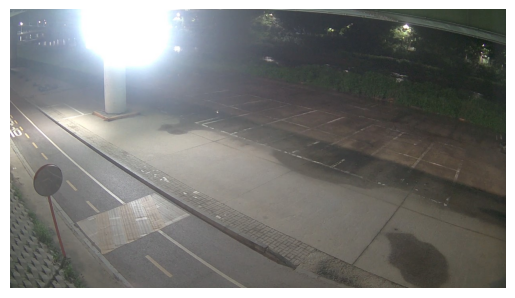

In [36]:
img_path = "../images/AY01.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')

## Inference

In [37]:
predictor.set_image(img)

masks, _, _ = predictor.predict(
    point_coords=None,
    box=None,
    multimask_output=False)

binary_mask = (masks[0, :, :] > 0).astype(np.float32)

## Visualization

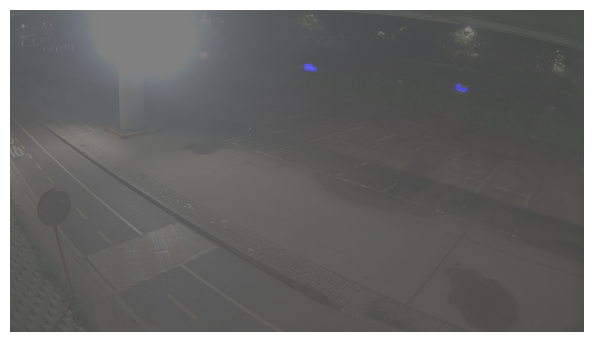

In [38]:
blue_mask = np.zeros_like(binary_mask)
blue_mask[binary_mask == 1] = 1
blue_mask_rgb = np.stack([np.zeros_like(blue_mask),
                          np.zeros_like(blue_mask), 
                          blue_mask], axis=-1)

plt.imshow(img, alpha=0.50)
plt.imshow(blue_mask_rgb, alpha=0.50)
plt.tight_layout()
plt.axis('off');

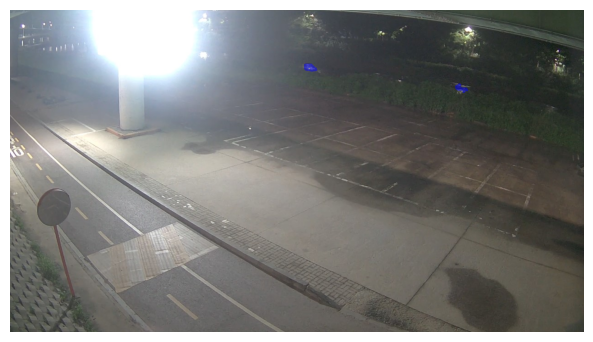

In [39]:
seg_img = img.copy()
seg_img[binary_mask==1] = (0,0,255)

transparent_img = cv2.addWeighted(img,0.5,seg_img,0.5,1.0)

plt.imshow(transparent_img)
plt.tight_layout()
plt.axis('off');